#  Quantum Communication | Surface Code

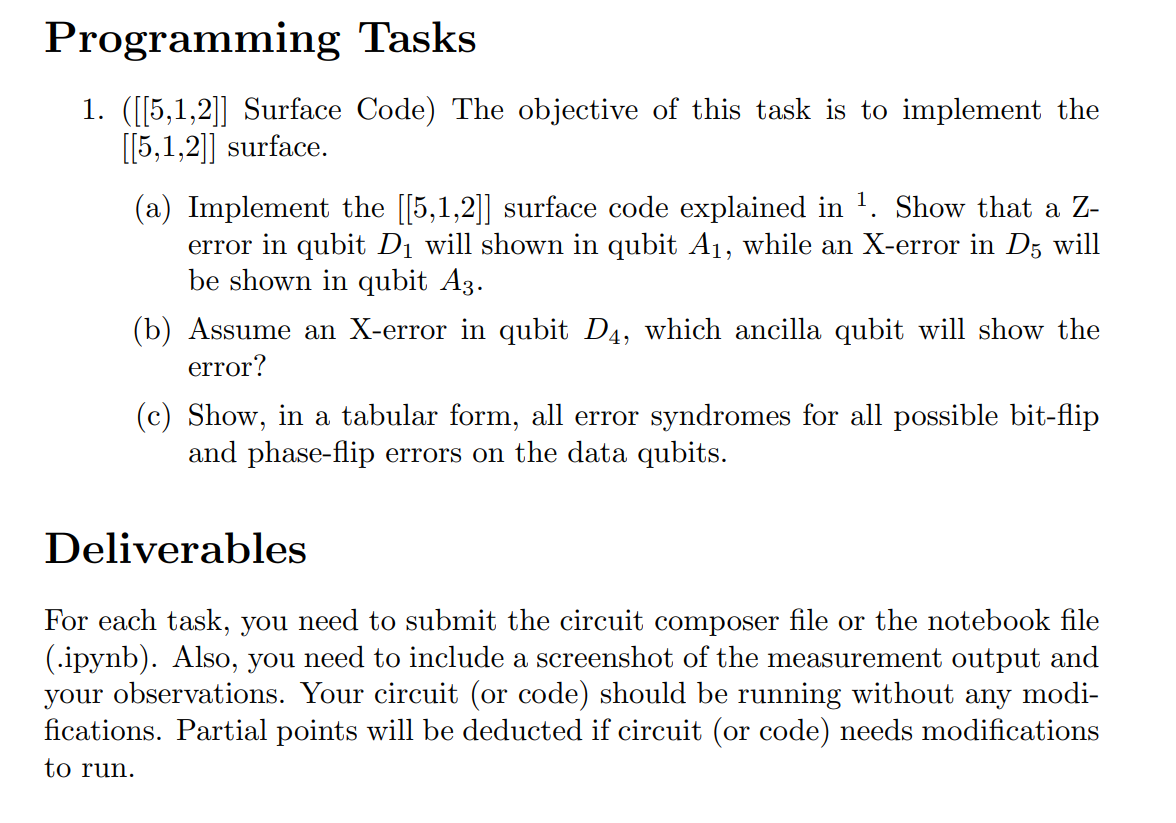

### Notice

<table style="width:66%; border: 1px solid black;">
    <tr>
        <td style="vertical-align: top;">
            $$
            \begin{align*}
                D_1 \rightarrow D_0 \\
                D_2 \rightarrow D_1 \\
                D_3 \rightarrow D_2 \\
                D_4 \rightarrow D_3 \\
                D_5 \rightarrow D_4 \\
            \end{align*}
            $$
        </td>
        <td style="vertical-align: top;">
            $$
            \begin{align*}
                A_1 \rightarrow A_0 \\
                A_2 \rightarrow A_1 \\
                A_3 \rightarrow A_2 \\
                A_4 \rightarrow A_3 \\
            \end{align*}
            $$
        </td>
    </tr>
    <tr>
</table>

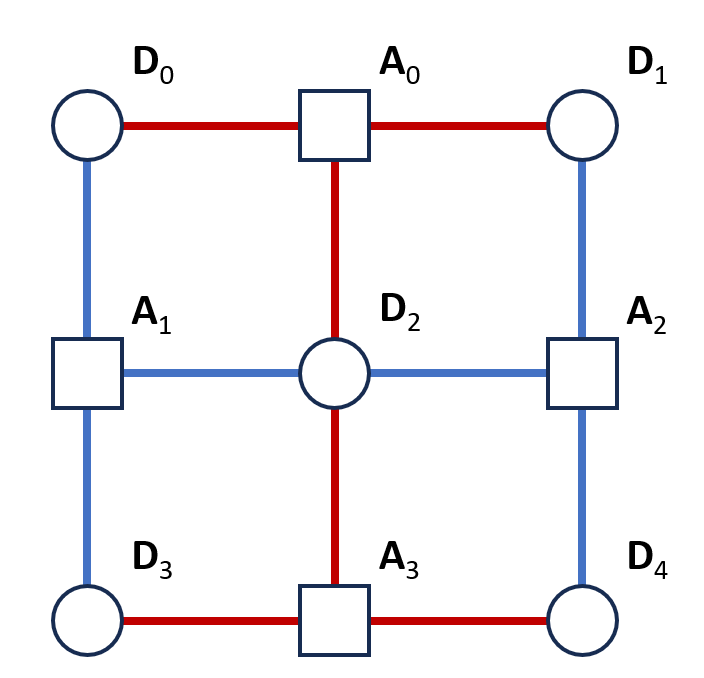

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [40]:
# mapping A -> Xd
XD = {
    0:[0,1,2],
    3:[2,3,4]
}

# mapping A -> Zd
ZD = {
    1: [0,1,2],
    2: [2,3,4]
}


def find_A(err_type, value):
    if err_type == 'x':
        data = XD
    if err_type == 'z':
        data = ZD
    keys = [key for key, values in data.items() if value in values]
    return keys

# err_type has to be 'x' or 'z' 
def initialize_surface_code(err_type=None, err_index=None):
    # n is the total number of qubits
    # k is the number of logical qubits
    n=5
    k=1
    m = n-k
    D = QuantumRegister(n, 'D')
    A = QuantumRegister(m, 'A')
    CA = ClassicalRegister(m)

    qc = QuantumCircuit(D,A, CA)
    
    if err_type is not None and err_type not in ['x', 'z']:
        raise ValueError("err_type must be 'x' or 'z'")
        
    if err_index is not None and not str.isdigit(str(err_index)):
        raise ValueError(f"err_index must be integer number")
    
    _i = None
    if err_type is not None and err_index is not None:
        qc.x(D[err_index])
        _i = find_A(err_type, err_index)
    
    
    for i in range(m):
        qc.h(A[i])

    qc.barrier()
    
    for a in XD.keys():
        for d in XD[a]:
            qc.cx(A[a],D[d])
        qc.barrier()

    for a in ZD.keys():
        for d in ZD[a]:
            qc.cz(A[a],D[d])
        qc.barrier()

    for i in range(4):
        qc.h(A[i])

    qc.barrier()
    
    qc.measure(A, CA)
#     if _i:
#         qc.measure(A[_i], CA[_i])

    return qc


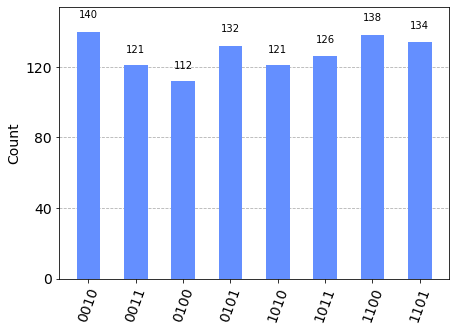

In [51]:
# Initialize the circuit
qc = initialize_surface_code(err_type='x', err_index=1)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

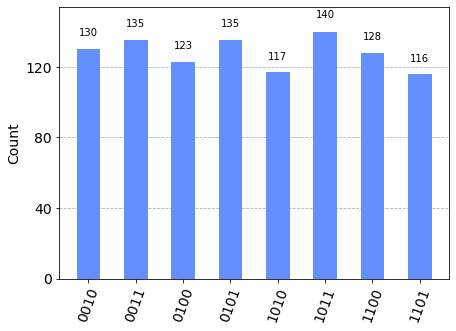

In [56]:
# Initialize the circuit
qc = initialize_surface_code(err_type='x', err_index=0)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

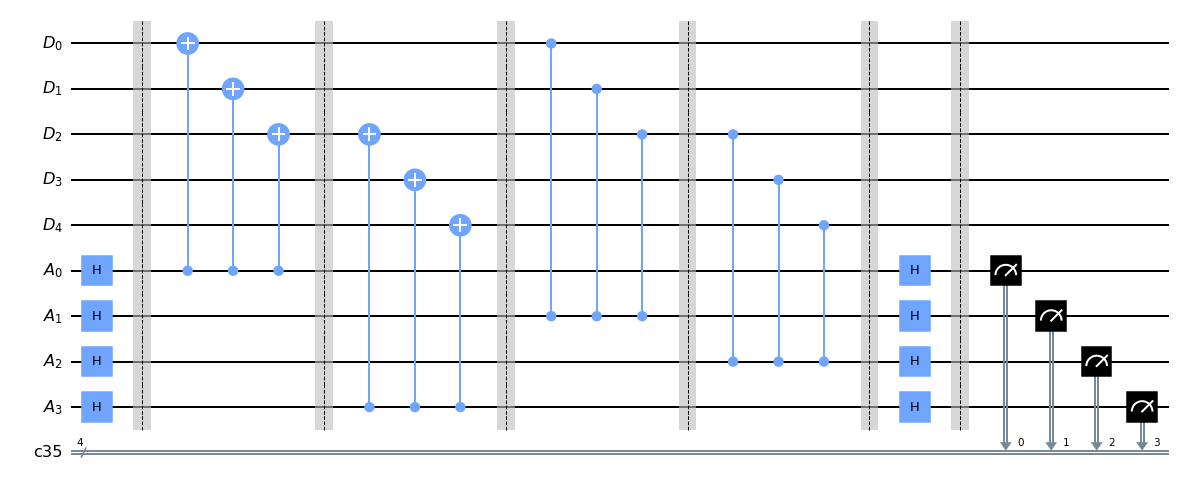

In [58]:
qc.draw(output='mpl')